<a href="https://colab.research.google.com/github/Akash-Adak/Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## 📘 K-Nearest Neighbors (KNN)

### 🔍 What is KNN?
K-Nearest Neighbors (KNN) is a **supervised learning algorithm** used for:
- **Classification**: Predicting discrete labels (e.g., species of flower)
- **Regression**: Predicting continuous values (e.g., house prices)

It is a **non-parametric**, **lazy learning** algorithm:
- **Non-parametric**: Makes no assumptions about data distribution.
- **Lazy**: No explicit training phase; all computation happens during prediction.

---

### 🧠 Intuition Behind KNN
Imagine plotting data points on a graph. When a new point arrives, KNN:
1. Measures the **distance** between this point and all others.
2. Selects the **k closest points** (neighbors).
3. For classification: assigns the **most common label** among neighbors.
4. For regression: returns the **average value** of neighbors.

---

### 📐 Distance Metrics
KNN relies on distance to find neighbors. Common metrics:

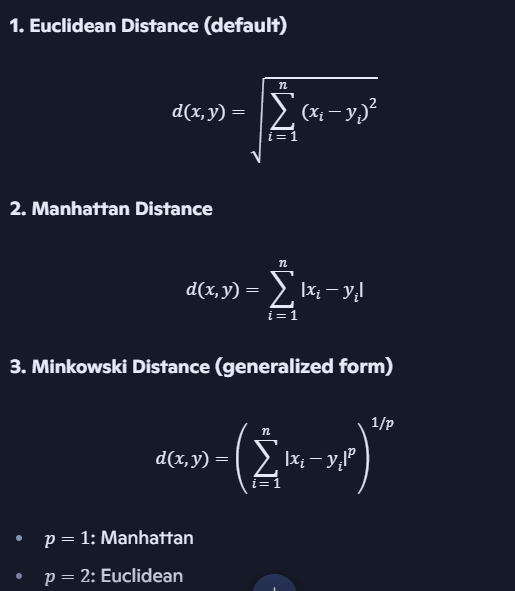
---

### ⚙️ KNN Workflow
1. **Choose k** (number of neighbors).
2. **Compute distances** between test point and all training points.
3. **Sort distances** and select k nearest neighbors.
4. **Vote or average**:
   - Classification → majority vote
   - Regression → mean of values

---

### 📊 Choosing the Right k
- **Small k** → sensitive to noise, low bias, high variance.
- **Large k** → smoother decision boundary, high bias, low variance.

Use **cross-validation** to find optimal k.

---

### 📈 Decision Boundaries
KNN creates **non-linear decision boundaries** that adapt to data shape. It’s ideal for datasets where classes aren’t linearly separable.

---

### ✅ Advantages
- Simple and intuitive
- No training time
- Works well with multi-class problems
- Flexible with distance metrics

---

### ❌ Limitations
- **Slow prediction** on large datasets (computes distance to all points)
- **Sensitive to irrelevant features** and **feature scaling**
- **Curse of dimensionality**: performance degrades in high dimensions

---

### 🧪 Feature Scaling
KNN is **distance-based**, so features must be on the same scale. Use:
- **Min-Max Scaling**
- **Standardization (Z-score)**

---

### 📚 Example Use Cases
- Handwritten digit recognition (MNIST)
- Recommender systems
- Medical diagnosis (e.g., tumor classification)
- Fraud detection

---

### 🧮 Mathematical Summary
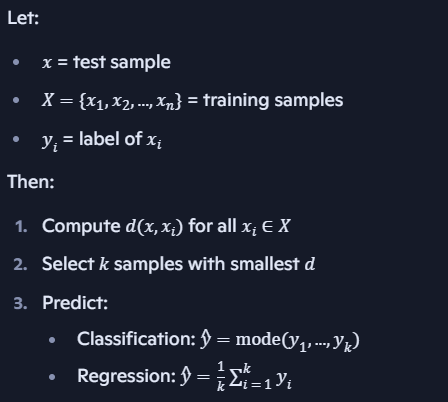




In [10]:
import numpy as np              # Imports NumPy for numerical operations and array handling
import pandas as pd            # Imports pandas for data manipulation and DataFrame support
import seaborn as sns          # Imports seaborn for data visualization (built on top of matplotlib)
from sklearn import datasets   # Imports scikit-learn's dataset module to load built-in datasets

iris = datasets.load_iris()    # Loads the Iris dataset into a dictionary-like object

iris.feature_names             # Lists the names of the features (e.g., sepal length, petal width)
iris.target_names              # Lists the target class labels (e.g., setosa, versicolor, virginica)


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
from sklearn import datasets                     # Imports scikit-learn's dataset module
iris = datasets.load_iris()                      # Loads the Iris dataset into a dictionary-like object

x = iris.data                                    # Extracts feature data (sepal/petal measurements)
y = iris.target                                  # Extracts target labels (species: 0=setosa, 1=versicolor, 2=virginica)

from sklearn.neighbors import KNeighborsClassifier as knc  # Imports KNN classifier and renames it as 'knc'
knn = knc(n_neighbors=10)                        # Creates a KNN classifier with k=10 neighbors
knn.fit(x, y)                                    # Trains the classifier on the entire dataset

knc(n_neighbors=10)                              # Redundant: creates another classifier but doesn't use it

pred = knn.predict([[6.6, 2.9, 4.6, 1.3]])        # Predicts the class of a new sample based on its features
print(iris.target_names[pred])                   # Prints the predicted class name (e.g., 'versicolor')
print(pred)                                      # Prints the predicted class index (e.g., [1])


['versicolor']
[1]


In [12]:
import pandas as pd                                      # Imports pandas for data manipulation and tabular data handling

iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
# Converts the Iris dataset's feature data into a pandas DataFrame with column names

print(iris_data)                                          # Prints the entire DataFrame (150 rows × 4 columns)

print(iris_data.head(10))                                 # Displays the first 10 rows of the dataset

print(iris_data.tail(10))                                 # Displays the last 10 rows of the dataset


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
   sepal length (cm)  sepal width (cm)  

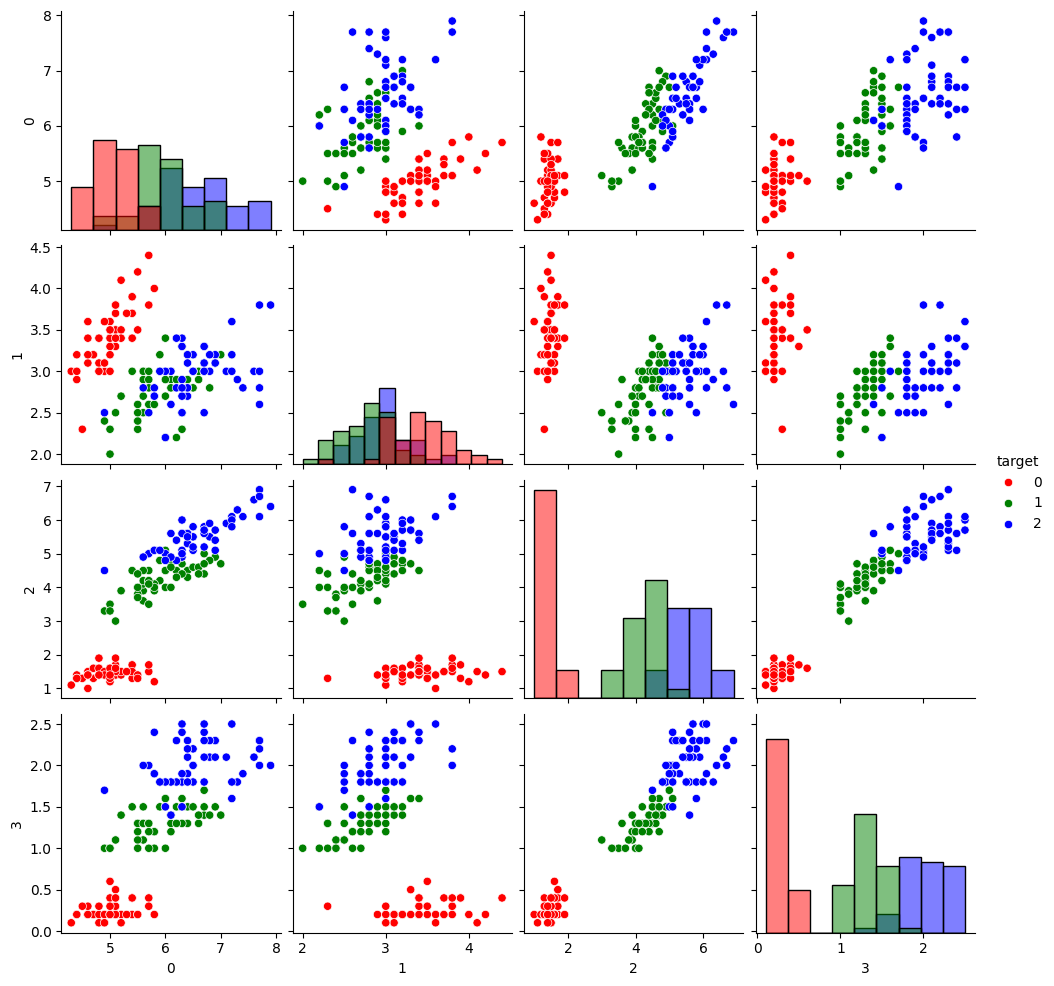

In [13]:
import pandas as pd  # Load pandas library for data manipulation and tabular operations

# Create a DataFrame from the Iris dataset's feature data with appropriate column names
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

print(iris_data)           # Display the entire dataset (150 samples × 4 features)

print(iris_data.head(10))  # Show the first 10 rows for a quick preview

print(iris_data.tail(10))  # Show the last 10 rows to inspect the dataset's end


In [14]:
from sklearn.model_selection import train_test_split  # Imports function to split dataset into training and testing sets
from sklearn.neighbors import KNeighborsClassifier    # Imports KNN classifier from scikit-learn
from sklearn.metrics import accuracy_score            # Imports accuracy metric to evaluate model performance

# Splits the dataset into training (80%) and testing (20%) sets with reproducible shuffling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

train_score_list = []  # List to store training accuracy for each k
test_score_list = []   # List to store testing accuracy for each k

k_range = range(1, 16)  # Defines range of k values to test (from 1 to 15)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initializes KNN classifier with current k
    knn.fit(x_train, y_train)                  # Trains the classifier on training data

    y_train_pred = knn.predict(x_train)        # Predicts labels for training set
    y_test_pred = knn.predict(x_test)          # Predicts labels for testing set

    train_score = accuracy_score(y_train, y_train_pred)  # Calculates training accuracy
    test_score = accuracy_score(y_test, y_test_pred)     # Calculates testing accuracy

    train_score_list.append(train_score)      # Stores training accuracy
    test_score_list.append(test_score)        # Stores testing accuracy

    # Prints accuracy for current k value
    print("k = %d | Train Accuracy = %.2f%%" % (k, train_score * 100))
    print("k = %d | Test Accuracy  = %.2f%%" % (k, test_score * 100))


k = 1 | Train Accuracy = 100.00%
k = 1 | Test Accuracy  = 100.00%
k = 2 | Train Accuracy = 97.50%
k = 2 | Test Accuracy  = 96.67%
k = 3 | Train Accuracy = 95.00%
k = 3 | Test Accuracy  = 96.67%
k = 4 | Train Accuracy = 95.00%
k = 4 | Test Accuracy  = 100.00%
k = 5 | Train Accuracy = 95.00%
k = 5 | Test Accuracy  = 96.67%
k = 6 | Train Accuracy = 95.83%
k = 6 | Test Accuracy  = 100.00%
k = 7 | Train Accuracy = 96.67%
k = 7 | Test Accuracy  = 100.00%
k = 8 | Train Accuracy = 96.67%
k = 8 | Test Accuracy  = 100.00%
k = 9 | Train Accuracy = 95.83%
k = 9 | Test Accuracy  = 100.00%
k = 10 | Train Accuracy = 96.67%
k = 10 | Test Accuracy  = 100.00%
k = 11 | Train Accuracy = 95.83%
k = 11 | Test Accuracy  = 100.00%
k = 12 | Train Accuracy = 97.50%
k = 12 | Test Accuracy  = 100.00%
k = 13 | Train Accuracy = 95.83%
k = 13 | Test Accuracy  = 100.00%
k = 14 | Train Accuracy = 97.50%
k = 14 | Test Accuracy  = 100.00%
k = 15 | Train Accuracy = 95.83%
k = 15 | Test Accuracy  = 100.00%
